In [25]:
# Comparing RO to INS data

import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
from figs import plot
import motion

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

import module
import settings

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rc("font", family=settings.FONT_FAMILY)
plt.rcParams['axes.titlepad'] = 20
plt.rcParams.update({'font.size': 16}) # was 28
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True
# text

module.set_sys_paths()

from mrg.logging import MonolithicDecoder
from mrg.adaptors.transform import PbSerialisedTransformToPython
from mrg.transform.conversions import se3_to_components, build_se3_transform

import numpy as np
from config.data import *

colour_ro = u'#d62728' #red
colour_spline = u'#1f77b4' #blue
colour_interpolation = u'#ff7f0e' #orange
colour_aux_1 = u'#2ca02c' #green
colour_ins = 'black' #black

In [40]:
# dataset_path = "/Users/roberto/data/spline-experiments/full-10k-raw-ro-vs-corrected-ro/"

# RO_relative_poses_path = dataset_path+"no-spline/ro_relative_poses.monolithic"
# spline_relative_poses_path = dataset_path+"with-spline/ro_relative_poses.monolithic"

dataset_path = "/tmp/"



INS_relative_poses_path = dataset_path+"flattened_novatel_generated_poses.monolithic"

# INS - open monolithic and iterate frames
print("reading INS_relative_poses_path: " + INS_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    INS_relative_poses_path)

# iterate mono
raw_INS_se3s = []
INS_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    raw_INS_se3s.append(serialised_transform[0])
    INS_timestamps.append(serialised_transform[1])

reading INS_relative_poses_path: /tmp/flattened_novatel_generated_poses.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2


In [41]:
RO_relative_poses_path = dataset_path+"ro_relative_poses.monolithic"
# interpolation_relative_poses_path = dataset_path+"ro_relative_poses_interpolation_corrected.monolithic"
interpolation_relative_poses_path = dataset_path+"ro_relative_poses_spline.monolithic" # MAJOR HACK! too lazy to change plots
spline_relative_poses_path = dataset_path+"ro_relative_poses_spline_corrected.monolithic"

# spline_relative_poses_path = dataset_path+"ro_relative_poses_spline.monolithic"
# spline_relative_poses_path = dataset_path+"ro_relative_poses_spline_corrected.monolithic"


# RO - open monolithic and iterate frames
print("reading RO_relative_poses_path: " + RO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    RO_relative_poses_path)

# iterate mono
RO_se3s = []
RO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    RO_se3s.append(serialised_transform[0])
    RO_timestamps.append(serialised_transform[1])
    
# Interpolated RO - open monolithic and iterate frames
print("reading interpolation_relative_poses_path: " + interpolation_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    interpolation_relative_poses_path)

# iterate mono
interpolation_se3s = []
interpolation_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    interpolation_se3s.append(serialised_transform[0])
    interpolation_timestamps.append(serialised_transform[1])
    
# Splined RO - open monolithic and iterate frames
print("reading spline_relative_poses_path: " + spline_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    spline_relative_poses_path)

# iterate mono
spline_se3s = []
spline_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    spline_se3s.append(serialised_transform[0])
    spline_timestamps.append(serialised_transform[1])
    
print("\nFinished importing.")

# RO_se3s = RO_se3s[3:]
# RO_timestamps = RO_timestamps[3:]
# interpolation_se3s = interpolation_se3s[3:]
# interpolation_timestamps = interpolation_timestamps[3:]
# print("Cropped first 3 estimates from RO for easier data analysis when comparing with spline estimates (they are two poses behind).")

RO_se3s = RO_se3s[1:]
RO_timestamps = RO_timestamps[1:]
# interpolation_se3s = interpolation_se3s[1:]
# interpolation_timestamps = interpolation_timestamps[1:]
print("Cropped first estimate from RO for easier data analysis when comparing with spline estimates (they are two poses behind).")

print(RO_timestamps[0])
print(interpolation_timestamps[0])
print(spline_timestamps[0])

reading RO_relative_poses_path: /tmp/ro_relative_poses.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading interpolation_relative_poses_path: /tmp/ro_relative_poses_spline.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading spline_relative_poses_path: /tmp/ro_relative_poses_spline_corrected.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2

Finished importing.
Cropped first estimate from RO for easier data analysis when comparing with spline estimates (they are two poses behind).
1503051668158974
1503051668158974
1503051668158974


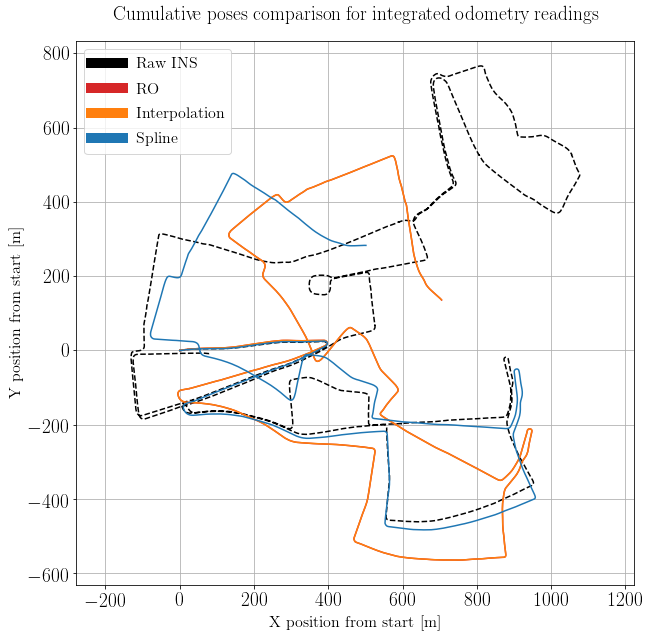

In [42]:
# get INS poses
INS_poses = []
pose = np.identity(4)
for i in range(len(raw_INS_se3s)):
    pose = pose * raw_INS_se3s[i]
    INS_poses.append(pose)

# get x,y coords
x_INS = [pose[0, 3] for pose in INS_poses]
y_INS = [pose[1, 3] for pose in INS_poses]
# downsample INS for figure rendering
x_INS_lite = x_INS[::10]
y_INS_lite = y_INS[::10]

# get RO poses
RO_poses = []
pose = np.identity(4)
for i in range(len(RO_se3s)):
    pose = pose * RO_se3s[i]
    RO_poses.append(pose)

# get x,y coords
x_RO = [pose[0, 3] for pose in RO_poses]
y_RO = [pose[1, 3] for pose in RO_poses]

# get interpolation poses
interpolation_poses = []
pose = np.identity(4)
for i in range(len(interpolation_se3s)):
    pose = pose * interpolation_se3s[i]
    interpolation_poses.append(pose)

# get x,y coords
x_interpolation = [pose[0, 3] for pose in interpolation_poses]
y_interpolation = [pose[1, 3] for pose in interpolation_poses]

# get spline poses
spline_poses = []
pose = np.identity(4)
for i in range(len(spline_se3s)):
    pose = pose * spline_se3s[i]
    spline_poses.append(pose)

# get x,y coords
x_spline = [pose[0, 3] for pose in spline_poses]
y_spline = [pose[1, 3] for pose in spline_poses]

plt.figure(figsize=(10,10)) # was 15,15
plt.plot(x_INS_lite,y_INS_lite,'--',color=colour_ins,markersize=1);
plt.plot(x_RO,y_RO,'-',color=colour_ro,markersize=1);
plt.plot(x_interpolation,y_interpolation,'-',color=colour_interpolation,markersize=1);
plt.plot(x_spline,y_spline,'-',color=colour_spline,markersize=1);
plt.axis('equal');
plt.title('Cumulative poses comparison for integrated odometry readings');
plt.xlabel('X position from start [m]');
plt.ylabel('Y position from start [m]');
line1, = plt.plot([],[],color=colour_ins,label='Raw INS',linewidth=10.0)
line2, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line3, = plt.plot([],[],color=colour_interpolation,label='Interpolation',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline,label='Spline',linewidth=10.0)
# plt.xlim(150, 200)
# plt.ylim(0,20)

plt.legend(handles=[line1,line2,line3,line4],loc='best')
plt.savefig(dataset_path+"figs/filename_all_poses.pdf",bbox_inches='tight',pad_inches = 0)

(20000, 40000)

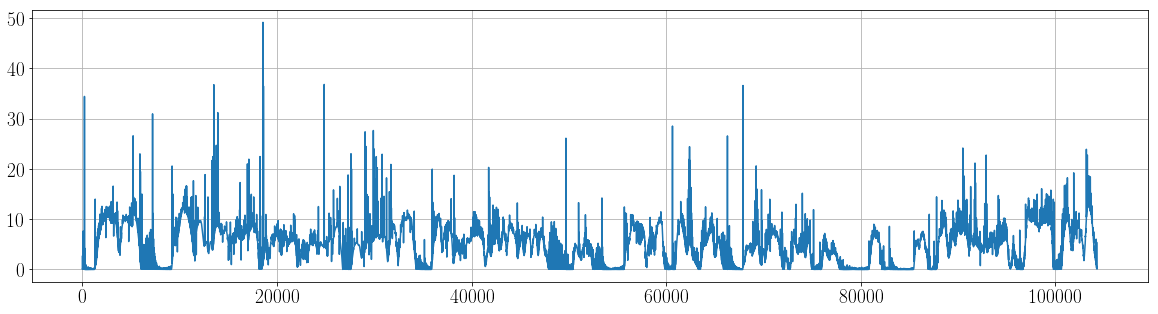

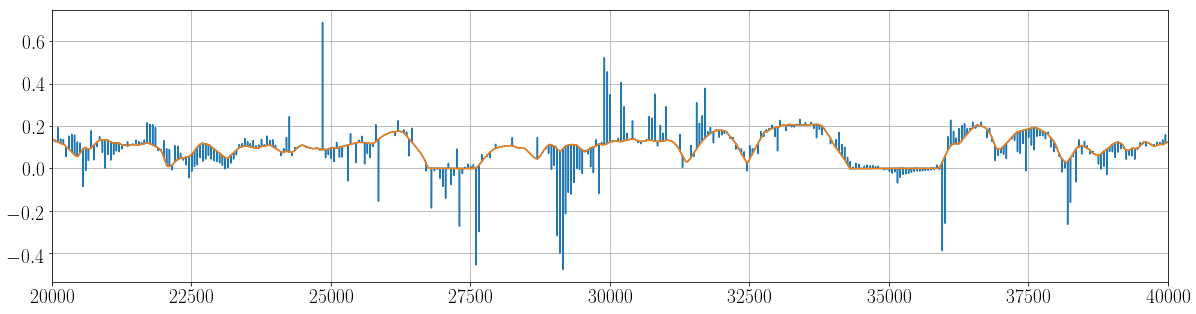

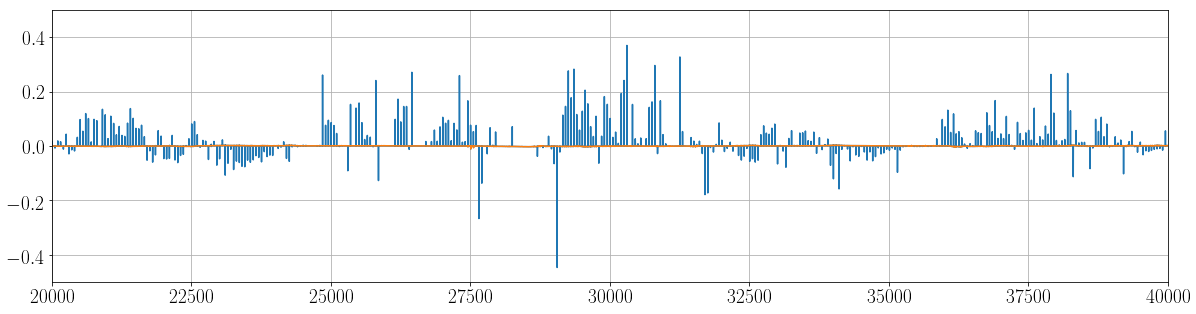

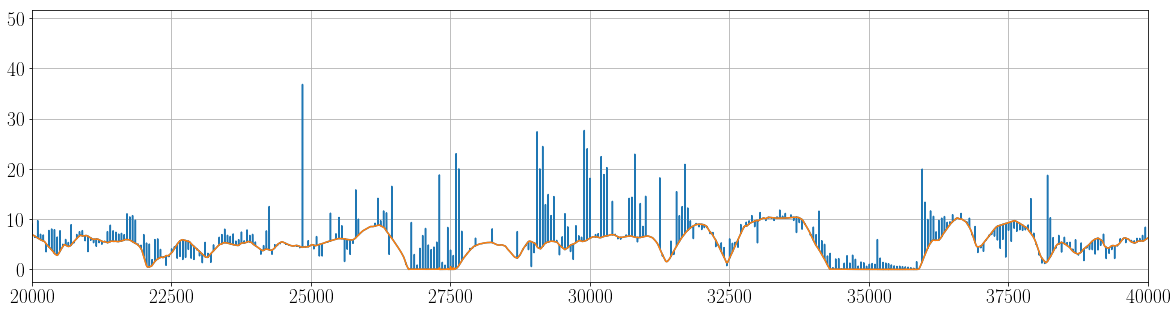

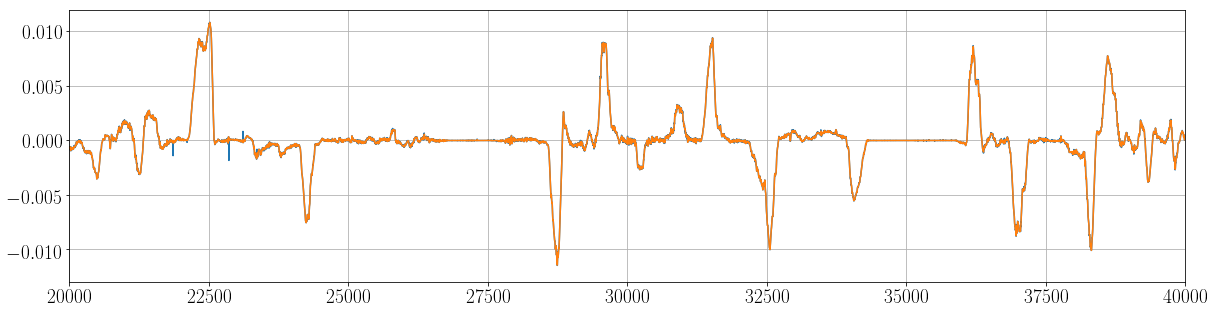

In [27]:
from scipy import signal

# get INS speeds
INS_speeds = []
INS_x_vals = []
INS_y_vals = []
filt_INS_se3s = []

# This is critical, otherwise we risk editing INS_se3s elements
for i in range(1,len(raw_INS_se3s)):
    filt_INS_se3s.append((np.matrix(raw_INS_se3s[i])))

deltatime_arr = []
for i in range(1,len(INS_timestamps)):
    INS_x_vals.append(raw_INS_se3s[i][0,3])
    INS_y_vals.append(raw_INS_se3s[i][1,3])
    # work out speed
    delta_time = (INS_timestamps[i] - INS_timestamps[i - 1]) / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = raw_INS_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    INS_speeds.append(speed)
    
filt_INS_x_vals = signal.medfilt(INS_x_vals,5)
filt_INS_y_vals = signal.medfilt(INS_y_vals,3)

filt_INS_speeds = []
for i in range(1,len(INS_timestamps)-1):
    # work out speed
    delta_time = (INS_timestamps[i] - INS_timestamps[i - 1]) / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    translation = [filt_INS_x_vals[i],filt_INS_y_vals[i]]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    filt_INS_speeds.append(speed)

#**********************************************************************
# TODO - replace this with se3_to_components method call - or maybe not...
#**********************************************************************
# INS yaw rates
INS_thetas = []
# for i in range(len(INS_timestamps) - 1):
#     # work out yaw_rate
# #     delta_time = (INS_timestamps[i + 1] - INS_timestamps[i]) / settings.TIMESTAMP_CONVERSION
#     se3 = filt_INS_se3s[i]
#     xyzrpy = se3_to_components(se3)
# #     yaw_rate = xyzrpy[-1] / delta_time
# #     INS_yaw_rates.append(yaw_rate)
#     INS_thetas.append(xyzrpy[-1])

INS_thetas = [np.arctan2(x[1, 0], x[0, 0]) for x in raw_INS_se3s]
filt_INS_thetas = signal.medfilt(INS_thetas,5)

# Adjust se3s after filtering has been done
for i in range(len(filt_INS_se3s)):
    filt_INS_se3s[i][0,0] = np.cos(filt_INS_thetas[i])
    filt_INS_se3s[i][0,1] = -np.sin(filt_INS_thetas[i])
    filt_INS_se3s[i][1,0] = np.sin(filt_INS_thetas[i])
    filt_INS_se3s[i][1,1] = np.cos(filt_INS_thetas[i])

    filt_INS_se3s[i][0,3] = filt_INS_x_vals[i]
    filt_INS_se3s[i][1,3] = filt_INS_y_vals[i]

plt.figure(figsize=(20,5))
plt.plot(INS_speeds);

plt.figure(figsize=(20,5))
plt.plot(INS_x_vals);
plt.plot(filt_INS_x_vals);
plt.xlim(20000,40000)

plt.figure(figsize=(20,5))
plt.plot(INS_y_vals);
plt.plot(filt_INS_y_vals);
plt.xlim(20000,40000)
plt.ylim(-0.5,0.5)

plt.figure(figsize=(20,5))
plt.plot(INS_speeds);
plt.plot(filt_INS_speeds);
plt.xlim(20000,40000)

plt.figure(figsize=(20,5))
plt.plot(INS_thetas)
plt.plot(filt_INS_thetas)
plt.xlim(20000,40000)

In [43]:
# get speeds
assert len(RO_se3s) == len(RO_timestamps)
RO_speeds = []
RO_TIMESTAMPS = []
deltatime_arr = []
for i in range(1,len(RO_timestamps)):
    # work out speed
    delta_time = (RO_timestamps[i] - RO_timestamps[i - 1]) / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = RO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    RO_speeds.append(speed)
    RO_TIMESTAMPS.append(RO_timestamps[i])

assert len(interpolation_se3s) == len(interpolation_timestamps)
interpolation_speeds = []
interpolation_TIMESTAMPS = []
deltatime_arr = []
for i in range(1,len(interpolation_timestamps)):
    # work out speed
    delta_time = (interpolation_timestamps[i] - interpolation_timestamps[i - 1]) / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = interpolation_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    interpolation_speeds.append(speed)
    interpolation_TIMESTAMPS.append(interpolation_timestamps[i])
    
# Technically there's a more principled way to determine speed from the control points using spline fusion
# This method is naive differentiation, but the speeds will change slightly depending 
# on the resolution of the estimated points
assert len(spline_se3s) == len(spline_timestamps)
spline_speeds = []
spline_TIMESTAMPS = []
deltatime_arr = []
for i in range(1,len(spline_timestamps)):
    # work out speed
    delta_time = (spline_timestamps[i] - spline_timestamps[i - 1]) / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = spline_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    spline_speeds.append(speed)
    spline_TIMESTAMPS.append(spline_timestamps[i])
    
INS_seconds = [(timestamp - INS_timestamps[0]) / settings.TIMESTAMP_CONVERSION for timestamp in INS_timestamps]
RO_seconds = [(timestamp - RO_TIMESTAMPS[0]) / settings.TIMESTAMP_CONVERSION for timestamp in RO_TIMESTAMPS]
interpolation_seconds = [(timestamp - interpolation_TIMESTAMPS[0]) / settings.TIMESTAMP_CONVERSION for timestamp in interpolation_TIMESTAMPS]
spline_seconds = [(timestamp - spline_TIMESTAMPS[0]) / settings.TIMESTAMP_CONVERSION for timestamp in spline_TIMESTAMPS]

time_offset = (INS_timestamps[0] - RO_timestamps[0])/settings.TIMESTAMP_CONVERSION

Text(0,0.5,'Velocity (m/s)')

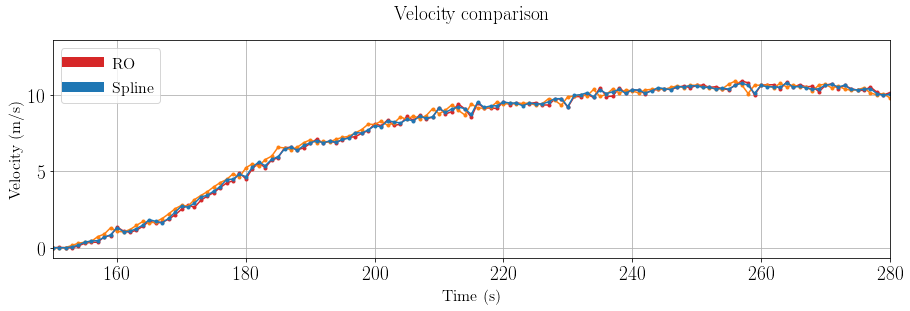

In [44]:
# Sanity check alignment
# Velocities
plt.figure(figsize=(15,4))
plt.plot(RO_speeds,'.-',color=colour_ro);
plt.plot(interpolation_speeds,'.-',color=colour_interpolation);
plt.plot(spline_speeds,'.-',color=colour_spline);

# plt.ylim(6,8)
plt.xlim(150,280)
line2, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line3, = plt.plot([],[],color=colour_spline,label='Spline',linewidth=10.0)
plt.legend(handles=[line2,line3],loc='best')
plt.title('Velocity comparison')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

In [30]:
print(INS_timestamps[0])

print(RO_timestamps[0])
print(RO_TIMESTAMPS[0])
print(RO_TIMESTAMPS[0] - RO_timestamps[0])
print(INS_timestamps[0] - RO_timestamps[0])
print((INS_timestamps[0] - RO_timestamps[0])/settings.TIMESTAMP_CONVERSION)

1503051681337404
1503051668158974
1503051668408579
249605
13178430
13.17843


Text(0,0.5,'Velocity (m/s)')

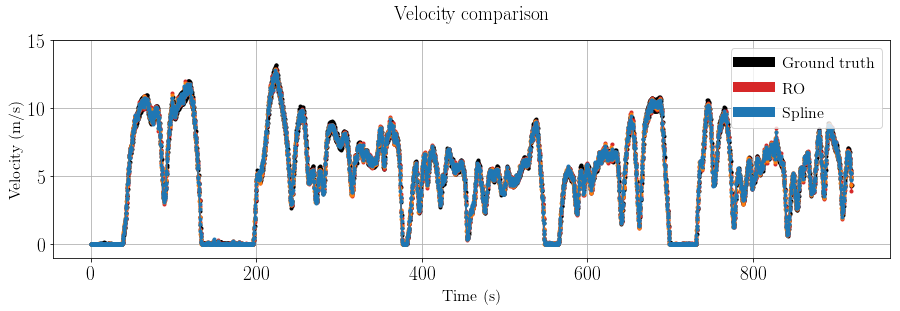

In [45]:
# Do interpolation (accumulatation for now)
interp_INS_speed = []
interp_INS_seconds = []
distance = 0
temp_speed = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i] and j < len(filt_INS_speeds)):
        distance += filt_INS_speeds[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1

    if(RO_timestamps[i] < (INS_timestamps[0]+(RO_timestamps[1]-RO_timestamps[0]))):
        distance = 0
    
    temp_speed = distance/(RO_timestamps[i]-RO_timestamps[i-1])
    interp_INS_speed.append(temp_speed)
    interp_INS_seconds.append(((INS_timestamps[j] - INS_timestamps[0]) / settings.TIMESTAMP_CONVERSION) + time_offset)
    distance = 0
    
plt.figure(figsize=(15,4))
plt.plot(interp_INS_seconds,interp_INS_speed,'.-',color=colour_ins)
plt.plot(RO_seconds,RO_speeds,'.-',color=colour_ro);
plt.plot(interpolation_seconds,interpolation_speeds,'.-',color=colour_interpolation);
plt.plot(spline_seconds,spline_speeds,'.-',color=colour_spline);

plt.ylim(-1,15)
# plt.xlim(30,100)
line1, = plt.plot([],[],color=colour_ins,label='Ground truth',linewidth=10.0)
line2, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line3, = plt.plot([],[],color=colour_spline,label='Spline',linewidth=10.0)
plt.legend(handles=[line1,line2,line3],loc='best')
plt.title('Velocity comparison')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

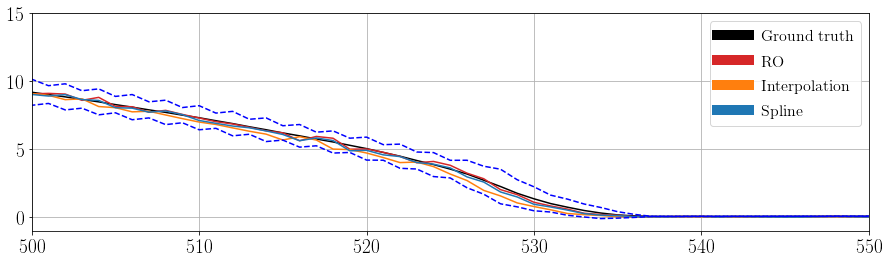

In [46]:
window_size = 5
std_devs = []
means = []
n_sigmas = 2
x_start = 0 #1000
x_end = len(interp_INS_speed) #1500

for i in range(window_size//2,len(interp_INS_speed)-window_size//2):
    window_contents = interp_INS_speed[i-window_size//2:i+window_size//2]
    std_devs.append(std(window_contents))
    means.append(mean(window_contents))
    
means = np.array(means)
means[-window_size//2:] = 0
means = np.roll(means,window_size//2)
means = means [1:]

std_devs = np.array(std_devs)
std_devs[-window_size//2:] = 0
std_devs = np.roll(std_devs,window_size//2)
std_devs = std_devs[1:]

plt.figure(figsize=(15,4))
plt.plot(means[x_start:x_end],color=colour_ins)
plt.plot(RO_speeds[x_start:x_end],'-',color=colour_ro);
plt.plot(interpolation_speeds[x_start:x_end],'-',color=colour_interpolation);
plt.plot(spline_speeds[x_start:x_end],'-',color=colour_spline);
plt.plot(means[x_start:x_end]+n_sigmas*std_devs[x_start:x_end],'b--')
plt.plot(means[x_start:x_end]-n_sigmas*std_devs[x_start:x_end],'b--')

plt.ylim(-1,15)
plt.xlim(500,550)

line1, = plt.plot([],[],color=colour_ins,label='Ground truth',linewidth=10.0)
line2, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line3, = plt.plot([],[],color=colour_interpolation,label='Interpolation',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline,label='Spline',linewidth=10.0)
plt.legend(handles=[line1,line2,line3,line4],loc='best')

In [47]:
INS_thetas = [np.arctan2(x[1, 0], x[0, 0]) for x in filt_INS_se3s]
RO_thetas = [np.arctan2(x[1, 0], x[0, 0]) for x in RO_se3s]
interpolation_thetas = [np.arctan2(x[1, 0], x[0, 0]) for x in interpolation_se3s]
spline_thetas = [np.arctan2(x[1, 0], x[0, 0]) for x in spline_se3s]

# INS yaw rates
INS_yaw_rates = []
for i in range(len(INS_timestamps) - 1):
    delta_time = (INS_timestamps[i + 1] - INS_timestamps[i]) / settings.TIMESTAMP_CONVERSION
    yaw_rate = INS_thetas[i] / delta_time
    INS_yaw_rates.append(yaw_rate)
    
# Do interpolation (accumulatation for now)
interp_INS_rot = []
interp_INS_seconds = []
angle = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i] and j < len(filt_INS_speeds)):
        angle += INS_yaw_rates[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1
    if(RO_timestamps[i] < (INS_timestamps[0]+(RO_timestamps[1]-RO_timestamps[0]))):
        angle = 0
    temp_rot = (angle/(RO_timestamps[i]-RO_timestamps[i-1]))
    interp_INS_rot.append(temp_rot)
    interp_INS_seconds.append(((INS_timestamps[j] - INS_timestamps[0]) / settings.TIMESTAMP_CONVERSION) + time_offset)
    angle = 0

# RO yaw rates
RO_yaw_rates = []
for i in range(len(RO_timestamps) - 1):
    delta_time = (RO_timestamps[i + 1] - RO_timestamps[i]) / settings.TIMESTAMP_CONVERSION
    yaw_rate = RO_thetas[i] / delta_time
    RO_yaw_rates.append(yaw_rate)

# Interpolation yaw rates
interpolation_yaw_rates = []
for i in range(len(interpolation_timestamps) - 1):
    delta_time = (interpolation_timestamps[i + 1] - interpolation_timestamps[i]) / settings.TIMESTAMP_CONVERSION
    yaw_rate = interpolation_thetas[i] / delta_time
    interpolation_yaw_rates.append(yaw_rate)
    
# Spline yaw rates
spline_yaw_rates = []
for i in range(len(spline_timestamps) - 1):
    delta_time = (spline_timestamps[i + 1] - spline_timestamps[i]) / settings.TIMESTAMP_CONVERSION
    yaw_rate = spline_thetas[i] / delta_time
    spline_yaw_rates.append(yaw_rate)

Text(0,0.5,'Velocity (rad/s)')

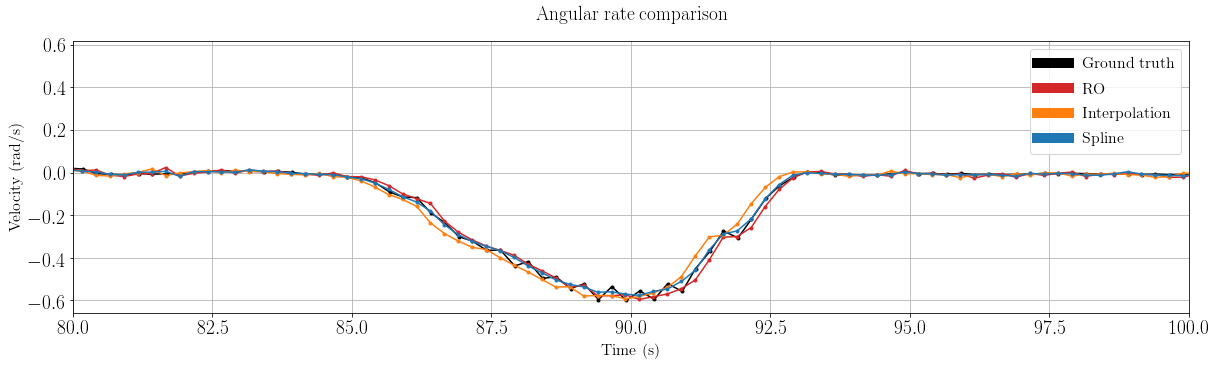

In [48]:
plt.figure(figsize=(20,5))
plt.plot(interp_INS_seconds, interp_INS_rot,'.-',color=colour_ins)
plt.plot(RO_seconds,RO_yaw_rates,'.-',color=colour_ro)
plt.plot(interpolation_seconds,interpolation_yaw_rates,'.-',color=colour_interpolation)
plt.plot(spline_seconds,spline_yaw_rates,'.-',color=colour_spline)

line1, = plt.plot([],[],color=colour_ins,label='Ground truth',linewidth=10.0)
line2, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line3, = plt.plot([],[],color=colour_interpolation,label='Interpolation',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline,label='Spline',linewidth=10.0)
plt.xlim(80, 100)
# plt.ylim(0.025,0.05)
plt.legend(handles=[line1,line2,line3,line4],loc='best')
plt.title('Angular rate comparison')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rad/s)')

Text(0,0.5,'Velocity (m/s)')

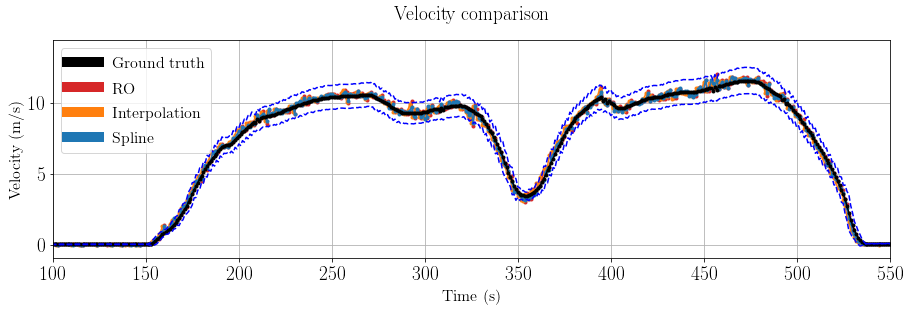

In [49]:
plt.figure(figsize=(15,4))
plt.plot(RO_speeds,'.-',color=colour_ro);
plt.plot(interpolation_speeds,'.-',color=colour_interpolation);
plt.plot(spline_speeds,'.-',color=colour_spline);
plt.plot(means,'.-',color=colour_ins)

plt.plot(means+n_sigmas*std_devs,'b--')
plt.plot(means-n_sigmas*std_devs,'b--')

# plt.ylim(7,11)
plt.xlim(100,550)
line1, = plt.plot([],[],color=colour_ins,label='Ground truth',linewidth=10.0)
line2, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line3, = plt.plot([],[],color=colour_interpolation,label='Interpolation',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline,label='Spline',linewidth=10.0)
plt.legend(handles=[line1,line2,line3,line4],loc='best')
plt.title('Velocity comparison')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

RO mean error:  0.13279163493555765 m
Raw spline mean error:  0.11564356407910045 m
Spline mean error:  0.12489805649983039 m


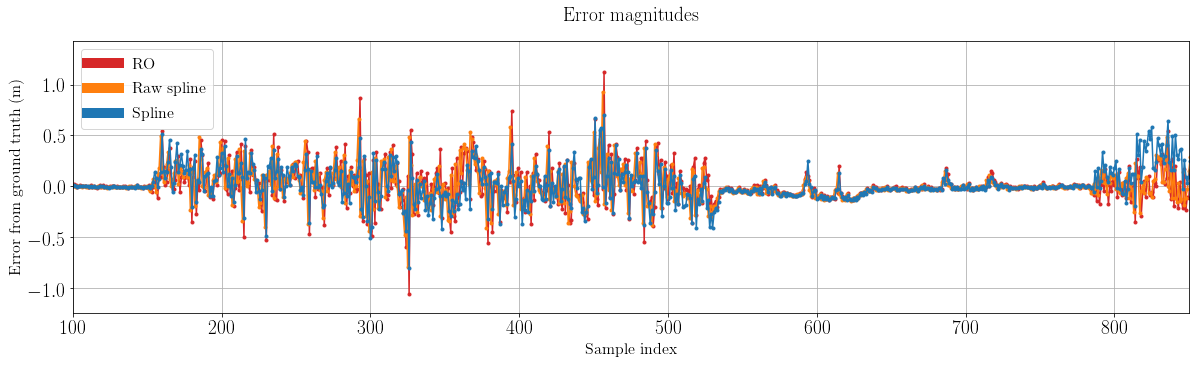

In [63]:
RO_error = np.array(RO_speeds[:-5]) - np.array(means[:-1])
interpolation_error = np.array(interpolation_speeds[:-7]) - np.array(means[1:-4])
spline_error = np.array(spline_speeds[:-3]) - np.array(means[:-1])

# getting a sense for how wobbly GT is...
INS_error = np.array(interp_INS_speed[:-5]) - np.array(means)

print('RO mean error: ',np.mean(np.absolute(RO_error)),'m')
print('Raw spline mean error: ',np.mean(np.absolute(interpolation_error)),'m')
print('Spline mean error: ',np.mean(np.absolute(spline_error)),'m')
# print('INS mean error: ',np.mean(np.absolute(INS_error)),'m')

plt.figure(figsize=(20,5))
plt.plot(RO_error,'.-',color=colour_ro)
plt.plot(interpolation_error,'.-',color=colour_interpolation)
plt.plot(spline_error,'.-',color=colour_spline)
# plt.plot(INS_error,'.-',color=colour_ins) 

line2, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line3, = plt.plot([],[],color=colour_interpolation,label='Raw spline',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline,label='Spline',linewidth=10.0)
plt.legend(handles=[line2,line3,line4],loc='best')
plt.title('Error magnitudes');
plt.ylabel('Error from ground truth (m)');
plt.xlabel('Sample index');

plt.xlim(100,850);
# plt.ylim(-1,1)

Text(0,0.5,'Sample index')

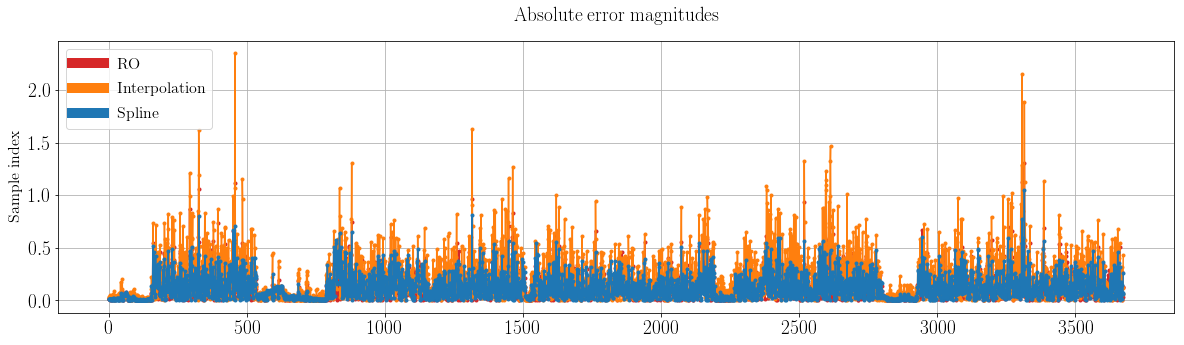

In [37]:
RO_abs_error = np.absolute(RO_error)
interpolation_abs_error = np.absolute(interpolation_error)
spline_abs_error = np.absolute(spline_error)

plt.figure(figsize=(20,5))
plt.plot(RO_abs_error,'.-',color=colour_ro)
plt.plot(interpolation_abs_error,'.-',color=colour_interpolation)
plt.plot(spline_abs_error,'.-',color=colour_spline)
line2, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line3, = plt.plot([],[],color=colour_interpolation,label='Interpolation',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline,label='Spline',linewidth=10.0)
plt.legend(handles=[line2,line3,line4],loc='best')
plt.title('Absolute error magnitudes')
plt.ylabel('Error from ground truth (m)')
plt.ylabel('Sample index')
# plt.xlim(0,500)